In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('octavos_df.csv')

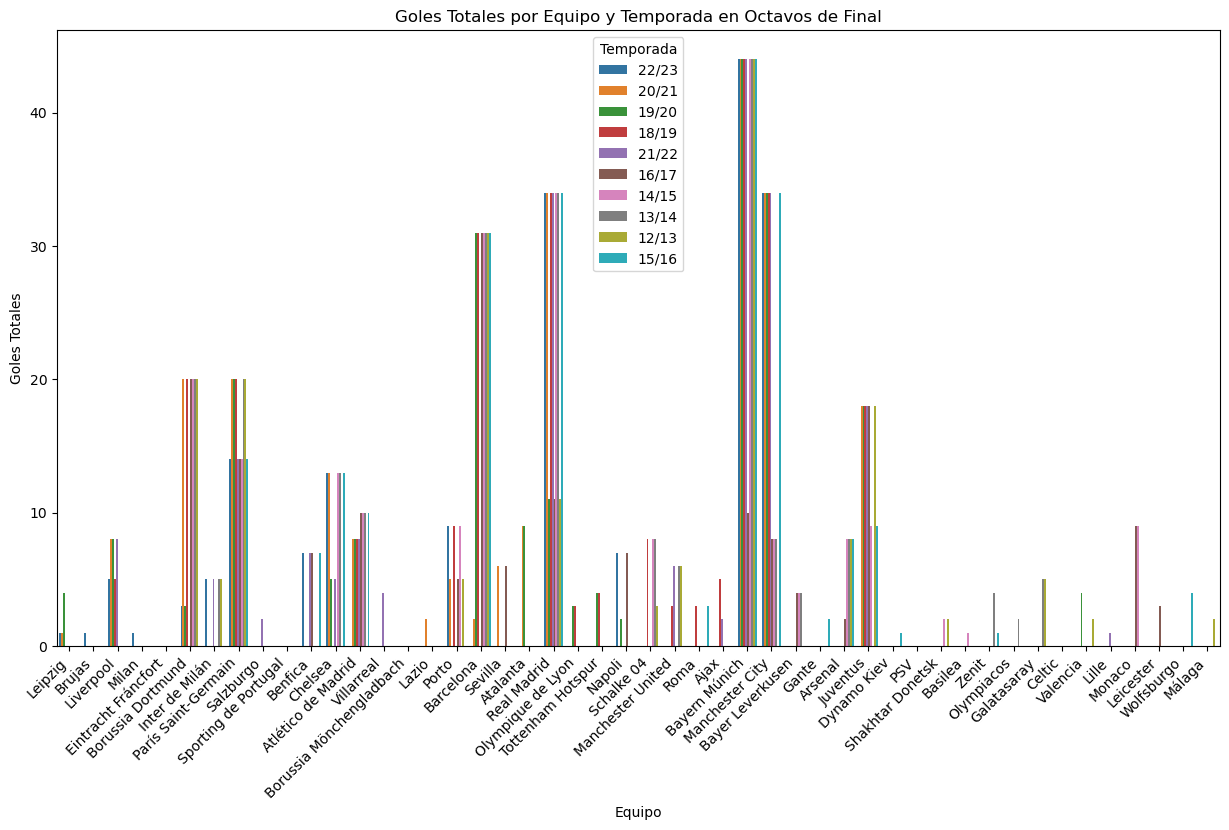

In [3]:
'''Gráfico de barras de los goles totales por equipo y temporada'''

# Crear una lista con los nombres únicos de los equipos en las columnas 'Equipo 1' y 'Equipo 2'
equipos_unicos = pd.unique(df[['Equipo 1', 'Equipo 2']].values.ravel('K'))

# Inicializar un DataFrame para almacenar los goles totales por equipo y temporada
goles_totales_por_equipo_temporada = pd.DataFrame(columns=['Temporada', 'Equipo', 'Goles_totales'])

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Filtrar las filas donde el equipo está en 'Equipo 1'
    filas_equipo_1 = df[df['Equipo 1'] == equipo]
    goles_totales_1 = filas_equipo_1['goles_1'].sum()

    # Filtrar las filas donde el equipo está en 'Equipo 2'
    filas_equipo_2 = df[df['Equipo 2'] == equipo]
    goles_totales_2 = filas_equipo_2['goles_2'].sum()

    # Concatenar los resultados en el DataFrame
    goles_totales_por_equipo_temporada = pd.concat([goles_totales_por_equipo_temporada,
                                                    pd.DataFrame({'Temporada': filas_equipo_1['Temporada'].tolist(),
                                                                  'Equipo': [equipo] * len(filas_equipo_1),
                                                                  'Goles_totales': goles_totales_1})])
    goles_totales_por_equipo_temporada = pd.concat([goles_totales_por_equipo_temporada,
                                                    pd.DataFrame({'Temporada': filas_equipo_2['Temporada'].tolist(),
                                                                  'Equipo': [equipo] * len(filas_equipo_2),
                                                                  'Goles_totales': goles_totales_2})])

# Graficar los goles totales por equipo y temporada
plt.figure(figsize=(15, 8))
sns.barplot(x='Equipo', y='Goles_totales', hue='Temporada', data=goles_totales_por_equipo_temporada)
plt.title('Goles Totales por Equipo y Temporada en Octavos de Final')
plt.xlabel('Equipo')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/98/7bgvzcwx7tz2bgwyh060mq100000gn/T/ipykernel_63726/92607349.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Equipo', y='Goles_totales', hue='Ida_Vuelta', data=goles_totales_por_equipo, ci=None)


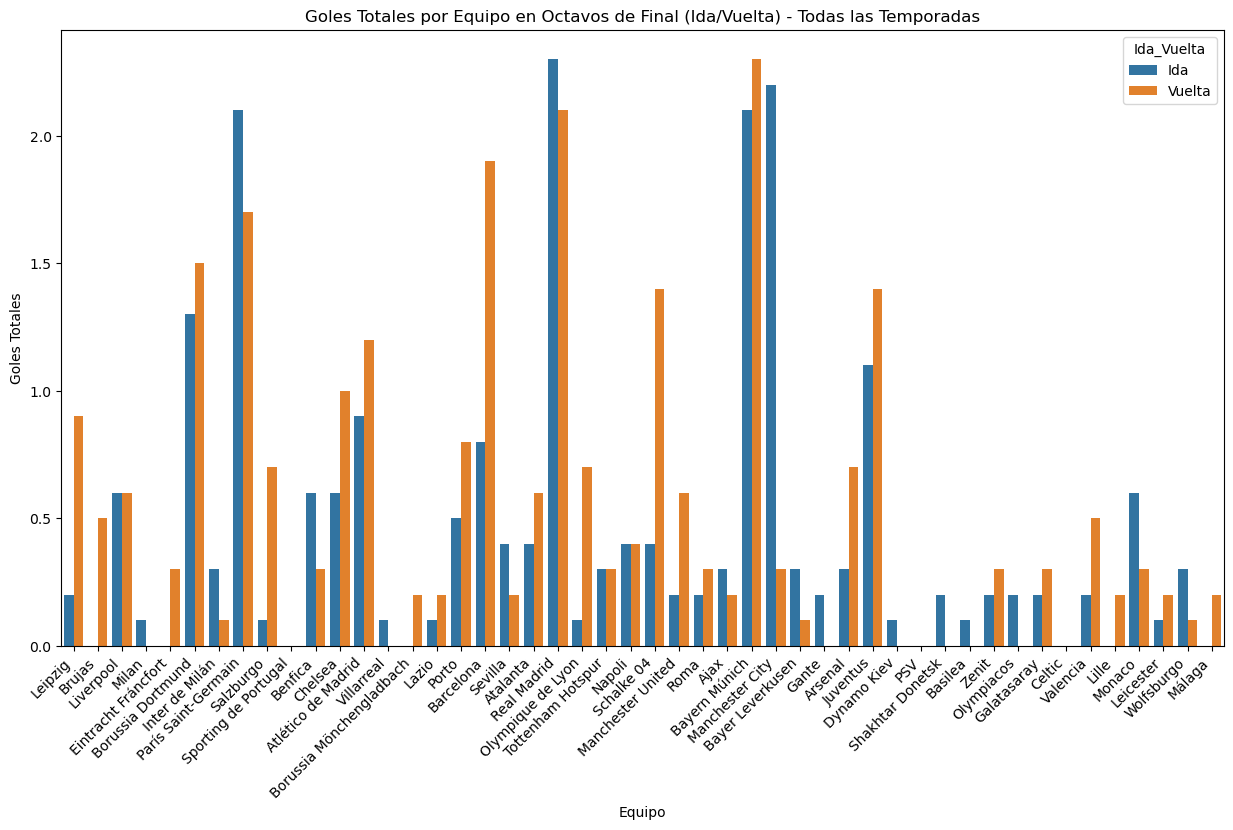

In [5]:
# Crear una lista con los nombres únicos de los equipos en las columnas 'Equipo 1' y 'Equipo 2'
equipos_unicos = pd.unique(df[['Equipo 1', 'Equipo 2']].values.ravel('K'))

# Inicializar un DataFrame para almacenar los goles totales por equipo e indicador de ida/vuelta
goles_totales_por_equipo = pd.DataFrame(columns=['Equipo', 'Temporada', 'Goles_totales', 'Ida_Vuelta'])

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Iterar sobre cada temporada
    for temporada in pd.unique(df['Temporada']):
        # Filtrar las filas donde el equipo está en 'Equipo 1'
        filas_equipo_1_ida = df[(df['Equipo 1'] == equipo) & (df['Temporada'] == temporada)]['goles_ida_1'].sum()
        filas_equipo_1_vuelta = df[(df['Equipo 1'] == equipo) & (df['Temporada'] == temporada)]['goles_vuelta_1'].sum()

        # Filtrar las filas donde el equipo está en 'Equipo 2'
        filas_equipo_2_ida = df[(df['Equipo 2'] == equipo) & (df['Temporada'] == temporada)]['goles_ida_2'].sum()
        filas_equipo_2_vuelta = df[(df['Equipo 2'] == equipo) & (df['Temporada'] == temporada)]['goles_vuelta_2'].sum()

        # Sumar los resultados en el DataFrame principal
        goles_totales_por_equipo = pd.concat([goles_totales_por_equipo,
                                              pd.DataFrame({'Equipo': [equipo],
                                                            'Temporada': [temporada],
                                                            'Goles_totales': [filas_equipo_1_ida + filas_equipo_2_ida],
                                                            'Ida_Vuelta': ['Ida']}),
                                              pd.DataFrame({'Equipo': [equipo],
                                                            'Temporada': [temporada],
                                                            'Goles_totales': [filas_equipo_1_vuelta + filas_equipo_2_vuelta],
                                                            'Ida_Vuelta': ['Vuelta']})])

# Graficar los goles totales por equipo en la ida y la vuelta
plt.figure(figsize=(15, 8))
sns.barplot(x='Equipo', y='Goles_totales', hue='Ida_Vuelta', data=goles_totales_por_equipo, ci=None)

plt.title('Goles Totales por Equipo en Octavos de Final (Ida/Vuelta) - Todas las Temporadas')
plt.xlabel('Equipo')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.show()

